In [16]:
# import tkinter
# import tkinter.ttk
# import time

# window = tkinter.Tk()
# canvas = tkinter.Canvas(master=window, width=650, height=500)
# start = time.time_ns()
# canvas.grid(row=0, column=0)
# img = tkinter.PhotoImage(file="imageFromKNN.png")
# canvas.create_image(50, 20, image=img, anchor="nw")
# end = time.time_ns()
# label = tkinter.ttk.Label(master=window,
#                           text=f"time = {str(round(end - start, 5))} ns")
# label.grid(row=1, column=0)
# window.geometry("750x600")
# window.mainloop()

In [17]:
# create input file 

# import os
# file_name = 'data/input_file_KNN.txt'
# with open(file_name,'w') as f:
#     file_list = os.listdir(str(f"{os.getcwd()}/classification-data-set/dataset-1"))
#     for fn in range(len(file_list)):
#         if fn==len(file_list)-1:
#             f.writelines(f'classification-data-set/dataset-1/{file_list[fn]}')
#         else:
#             f.writelines(f'classification-data-set/dataset-1/{file_list[fn]}' + '\n')


In [18]:
import matplotlib.pyplot
import numpy
import statistics
import tkinter
import tkinter.ttk
import time
import sys
import math

In [19]:
def ClassifyByKNN(*args):
    # print(*args)
    classesAndColors = args[len(args) - 1]
    print('classes and colors ', classesAndColors)
    queryX = args[len(args) - 2][0]
    queryY = args[len(args) - 2][1]
    query = args[len(args) - 2]
    for i in range(len(args) - 2):
        x, y = numpy.array(args[i]).T
        matplotlib.pyplot.scatter(x, y, color=classesAndColors[i][1])
    matplotlib.pyplot.plot(queryX,
                           queryY,
                           color=args[len(args) - 2][2],
                           marker="o",
                           markersize=20)
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.savefig('imageFromKNN.png', transparent=True)
    # matplotlib.pyplot.show()
    distanceList = []
    for i in range(len(args) - 2):
        for p in args[i]:
            sumOfSquares = 0
            qi = 0
            ep = len(query) - 2
            while qi <= ep:
                qd = (p[qi] - query[qi])**2
                sumOfSquares += qd
                qi += 1
            distance = math.sqrt(sumOfSquares)
            #xd = abs(p[0]-queryX)
            #yd = abs(p[1]-queryY)
            # distance = math.sqrt(xd**2+yd**2)
            distanceList.append((classesAndColors[i][0], distance))
    # print('Calculated Distances : ', distanceList)
    distanceList.sort(key=lambda x: x[1])
    print("*" * 50)
    print(len(distanceList))
    kFactor = int(math.sqrt(len(distanceList)))
    if kFactor % len(classesAndColors) == 0:
        kFactor += 1
    if kFactor % 2 == 0:
        kFactor += 1
    kElements = distanceList[:kFactor]
    print("*" * 50)
    # print(kElements)
    classes = [x[0] for x in kElements]
    return statistics.mode(classes)


4
classes and colors  (('A', 'b'), ('B', 'r'), ('C', 'g'), ('D', '#8E44AD'))
**************************************************
20000
**************************************************
(80,100) belongs to B
error :  image "pyimage1" doesn't exist
Usages : python3 eg1.py <input_file.txt>


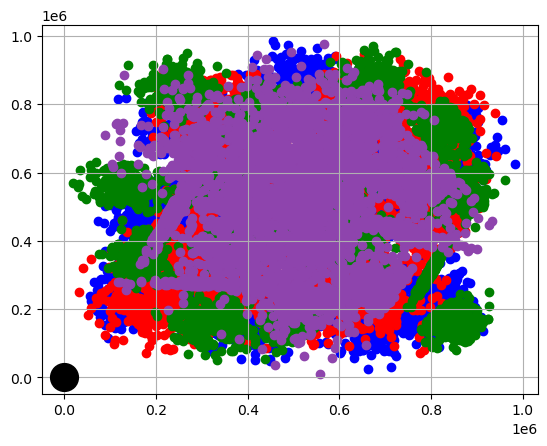

In [20]:
try:
    start = time.time()  #======================
    window = tkinter.Tk()
    canvas = tkinter.Canvas(master=window, width=650, height=500)
    canvas.grid(row=0, column=0)
    file_name = sys.argv[1]
    if not file_name:
        file_name = 'data/input_file_KNN.txt'
    f = open(file_name, 'r')
    file_list = f.readlines()
    f.close()
    datasets = []
    for i in sorted(file_list):
        lst = []
        with open(i.strip('\n'), 'r') as f:
            lst.extend(
                tuple(int(j) for j in data.strip('\n').lstrip().split())
                for data in f)
        datasets.append(lst)
    print(len(datasets))
    c = ClassifyByKNN(*datasets, (80, 100, "k"),
                      (("A", "b"), ("B", "r"), ("C", "g"), ("D", "#8E44AD")))
    print(f"(80,100) belongs to {c}")
    img = tkinter.PhotoImage(file="imageFromKNN.png")
    canvas.create_image(50, 20, image=img, anchor="nw")
    end = time.time()
    label = tkinter.ttk.Label(master=window,
                              text=f"time = {str(round(end - start, 5))}")
    label.grid(row=1, column=0)
    window.geometry("750x600")
    window.mainloop()
except Exception as e:
    print("error : ", e)
    print("Usages : python3 eg1.py <input_file.txt>")